In [1]:
from imports import *
from compute_nRV_GP import compute_nRV_GP
%matplotlib inline

In [2]:
# define parameters
sigacts, Prots = np.logspace(-2, 2, 20), np.logspace(-1,2.3,20)
keptheta = 1.51, 3.08
sigRVphot = 1.84

In [60]:
# WTF is this?? (why are the results so different for similar input values?)
GPtheta1 = 5.0, 9.2120036531381757, 1.9889259153394498, 3.0, 0.0
GPtheta2 = 5.46, 10.97, 2.0, 3.66, 0.0
print compute_nRV_GP(GPtheta1, keptheta, sigRVphot, keptheta[1]/3.)
print compute_nRV_GP(GPtheta2, keptheta, sigRVphot, keptheta[1]/3.)

420.750669007
36.0645069443


In [7]:
# compute nRVs
try:
    nRVs = np.loadtxt('nRV_map/nRVmap.dat')
except IOError:
    nRVs = np.zeros((sigacts.size, Prots.size))
    t0 = time.time()
    for i in range(sigacts.size):
        print float(i)/ sigacts.size
        for j in range(Prots.size):
            GPtheta  = sigacts[i], Prots[j]*3, 2., Prots[j], 0.
            nRVs[i,j] = compute_nRV_GP(GPtheta, keptheta, sigRVphot, keptheta[1]/3.)
    print 'Took %.3f minutes'%((time.time()-t0)/60.)
    np.savetxt('nRV_map/nRVmap.dat', nRVs, delimiter='\t', fmt='%.5f')

[ 33.24896]


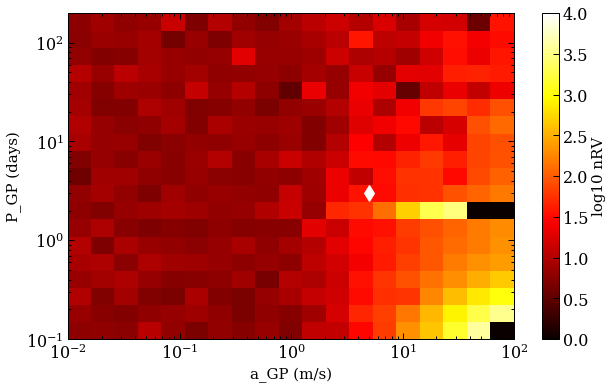

In [31]:
nRVstmp = nRVs*1
nRVstmp[nRVs>1e4] = np.nan
plt.figure(figsize=(10,6))
plt.pcolormesh(sigacts, Prots, np.log10(nRVstmp.T), cmap=plt.get_cmap('hot'), vmin=0, vmax=4)
plt.colorbar(label='log10 nRV')
plt.xscale('log'), plt.yscale('log')
plt.xlabel('a_GP (m/s)'), plt.ylabel('P_GP (days)')

# estimate nRV for trappist-1
trapppist_sigeff, trapppist_prot = 5, 3 
plt.plot(trapppist_sigeff, trapppist_prot, 'wd', ms=12)
gp = abs(Prots-trapppist_prot) == np.min(abs(Prots-trapppist_prot))
gs = abs(sigacts-trapppist_sigeff) == np.min(abs(sigacts-trapppist_sigeff))
print nRVstmp[gs,gp]

(None, <matplotlib.text.Text at 0x1a24f64bd0>)

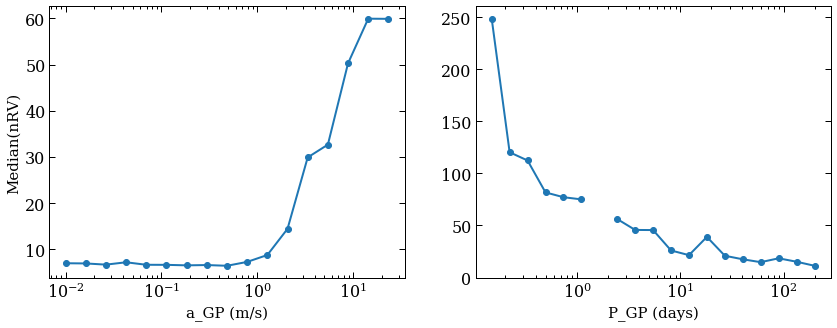

In [47]:
plt.figure(figsize=(14,5))
plt.subplot(121), plt.plot(sigacts, np.median(nRVstmp, 1))
plt.xscale('log'), plt.xlabel('a_GP (m/s)'), plt.ylabel('Median(nRV)')
plt.subplot(122), plt.plot(Prots, np.median(nRVstmp[10:], 0))
plt.xscale('log'), plt.xlabel('P_GP (days)')